## installing the needed libraries and mount drive to colab

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Split the data and drop the duplicated img

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
!cp '/content/drive/MyDrive/dataset.zip' "visualpollution.zip"

In [ ]:
!unzip /content/visualpollution.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/fa2405166ec7764b052959f55b2cb21e.jpg  
  inflating: dataset/images/2c6cfe092f7ae14cd67f79633e7b329c.jpg  
  inflating: dataset/images/e25504419a506119a04982130738469a.jpg  
  inflating: dataset/images/c690dd80504ff3956e1e50a2fbc7c7f4.jpg  
  inflating: dataset/images/e4b35fb8567c0d8d99de36e96bc4fde9.jpg  
  inflating: dataset/images/beaf13e79379657b526c349e95821023.jpg  
  inflating: dataset/images/4e90d0fe2795542468fb5d1cc1834c10.jpg  
  inflating: dataset/images/5235b7a1aef39d0539839873d5a3418a.jpg  
  inflating: dataset/images/f48ae52f06f8075c628e6a438e93426f.jpg  
  inflating: dataset/images/133d32aab2d56507ccb45c9609b2ec48.jpg  
  inflating: dataset/images/f30492c8c7d9b5d4d939e6035fa73170.jpg  
  inflating: dataset/images/3403ec3125fd76b911e88ada121e366a.jpg  
  inflating: dataset/images/be0992e2f3b9093139358e2d83e6fecc.jpg  
  inflating: dataset/images/710796142ecb047ea6839a88063ba4a3.jpg  
  inflating

In [ ]:
import pandas as pd
df = pd.read_csv("/content/dataset/train.csv")
df.head()

class                            image_path           name   xmax   xmin  \
0    3.0  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE  797.0  701.0   
1    3.0  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE  932.0  786.0   
2    3.0  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE  736.0  657.0   
3    7.0  ea906a663da6321bcef78be4b7d1afff.jpg  BAD_BILLBOARD  986.0  786.0   
4    8.0  1c7d48005a12d1b19261b8e71df7cafe.jpg   SAND_ON_ROAD  667.0  549.0   

    ymax   ymin  
0  262.0  211.0  
1  329.0  238.0  
2  275.0  229.0  
3  136.0    0.0  
4  228.0  179.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19950 entries, 0 to 19949
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       19950 non-null  float64
 1   image_path  19950 non-null  object 
 2   name        19950 non-null  object 
 3   xmax        19950 non-null  float64
 4   xmin        19950 non-null  float64
 5   ymax        19950 non-null  float64
 6   ymin        19950 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
df.groupby("class")["name"].value_counts()

class  name             
0.0    GRAFFITI             1124
1.0    FADED_SIGNAGE         107
2.0    POTHOLES             2625
3.0    GARBAGE              8597
4.0    CONSTRUCTION_ROAD    2730
5.0    BROKEN_SIGNAGE         83
6.0    BAD_STREETLIGHT         1
7.0    BAD_BILLBOARD        1555
8.0    SAND_ON_ROAD          748
9.0    CLUTTER_SIDEWALK     2253
10.0   UNKEPT_FACADE         127
Name: name, dtype: int64

In [ ]:
import shutil
img_scr_path = "/content/dataset/images/53d3797457a0d2e3afe146e2f797e77e.jpg"
img_dsc_path = "/content/dataset/images/53d3797457a0d2e3afe146e2f797e77er.jpg"
shutil.copy(img_scr_path, img_dsc_path)

In [ ]:
df = df.append({'class': 6.0, 'image_path':"53d3797457a0d2e3afe146e2f797e77er.jpg",
                'name':'BAD_STREETLIGHT','xmax':985.0, 'xmin':359.0, 
                'ymax':161.0, 'ymin':-47.0}, ignore_index=True)

In [ ]:
df.tail()

In [ ]:
#df_unique = df.drop_duplicates("image_path")
# drop rows which have same order_id
# and customer_id and keep latest entry
df_unique = df.drop_duplicates(
  subset = ['image_path', 'name'],
  keep = 'last').reset_index(drop = True)

In [ ]:
print(len(df), len(df_unique))

In [ ]:
#Split into test train
from sklearn.model_selection import train_test_split
train, valid = train_test_split(df_unique, test_size=0.2, random_state=43, stratify=df_unique["name"])

## create folder contain a train img for data augmantetion

In [ ]:
import os
import shutil
path = '/content/dataset/classes'
if os.path.exists(path):
  shutil.rmtree('/content/dataset/classes')
else:
  pass

In [ ]:
# Create class dir
os.mkdir("/content/dataset/classes")

In [ ]:
## train file only have one boundry box same for validation, i will append the rest later
train.to_csv("/content/dataset/classes/trian_split.csv")
valid.to_csv("/content/dataset/classes/valid_split.csv")

In [ ]:
train.head()

class                            image_path               name   xmax  \
6064    3.0  ff416a5a37bda61cc9b6d0da4a7f5ecc.jpg            GARBAGE  915.0   
2152    3.0  59b12b9192c437f914bdedd61d091f32.jpg            GARBAGE  577.0   
4938    4.0  28e3a81d938afb7fe2254c1146cdb80e.jpg  CONSTRUCTION_ROAD  297.0   
8086    3.0  cbd2568750f86883f19287733bda4497.jpg            GARBAGE  305.0   
2297    3.0  81e33b53092e18376a2641d7b316ff8c.jpg            GARBAGE  216.0   

       xmin   ymax   ymin  
6064  793.0  302.0  171.0  
2152  455.0  311.0  224.0  
4938  107.0  237.0  179.0  
8086  239.0  383.0  331.0  
2297  136.0  311.0  241.0

In [ ]:
## save train and validation file to drive
train.to_csv("/content/drive/MyDrive/Smarthachthon/classes/trian_data.csv")
valid.to_csv("/content/drive/MyDrive/Smarthachthon/classes/valid_data.csv")

In [ ]:
## copying img of BAD_STREETLIGHT class __under test
def copy_train_img_drive(name):
  class_name = train[train["name"] == name]["image_path"]
  img_dir = "/content/dataset/images"
  img_dis = f"/content/dataset/classes/{name}"
  if os.path.exists(img_dis):
    pass
  else:
    os.mkdir(img_dis)
  for img_name in class_name.iteritems():
      img_name = img_name[1]
      img_scr_path = f"{img_dir}/{img_name}"
      img_dsc_path = f"{img_dis}/{img_name}"

      shutil.copy(img_scr_path, img_dsc_path)

  drive_dis = "/content/gdrive/MyDrive/Smarthachthon/classes"
  if os.path.exists(drive_dis):
    pass
  else:
    os.mkdir(drive_dis)
  return img_dis, drive_dis

In [ ]:
img_dis, drive_dis = copy_train_img_drive(name = "GARBAGE")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/GARBAGE' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GARBAGE'
'/content/dataset/classes/GARBAGE/ff416a5a37bda61cc9b6d0da4a7f5ecc.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GARBAGE/ff416a5a37bda61cc9b6d0da4a7f5ecc.jpg'
'/content/dataset/classes/GARBAGE/59b12b9192c437f914bdedd61d091f32.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GARBAGE/59b12b9192c437f914bdedd61d091f32.jpg'
'/content/dataset/classes/GARBAGE/cbd2568750f86883f19287733bda4497.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GARBAGE/cbd2568750f86883f19287733bda4497.jpg'
'/content/dataset/classes/GARBAGE/81e33b53092e18376a2641d7b316ff8c.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GARBAGE/81e33b53092e18376a2641d7b316ff8c.jpg'
'/content/dataset/classes/GARBAGE/6ecdf5e6afafdc9e63c161e43c8f2c26.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GARBAGE/6ecdf5e6afafdc9e63c161e43c8f2c26.jpg'
'/content/dataset/classes/GARBAGE/ab839e9b76d032bba4838c0719a4857f

In [ ]:
img_dis, drive_dis = copy_train_img_drive(name = "GRAFFITI")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/GRAFFITI' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI'
'/content/dataset/classes/GRAFFITI/4ad23c165c20e6c9f82970a8c55dc7d4.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI/4ad23c165c20e6c9f82970a8c55dc7d4.jpg'
'/content/dataset/classes/GRAFFITI/87e10560916fbbb090187f6ede6a6036.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI/87e10560916fbbb090187f6ede6a6036.jpg'
'/content/dataset/classes/GRAFFITI/e68207517c91cee93dc3e14d6b813fdc.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI/e68207517c91cee93dc3e14d6b813fdc.jpg'
'/content/dataset/classes/GRAFFITI/c72109dd82dfcfa5e475926a1137d502.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI/c72109dd82dfcfa5e475926a1137d502.jpg'
'/content/dataset/classes/GRAFFITI/031838d07afce4c40b207256835eafa1.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI/031838d07afce4c40b207256835eafa1.jpg'
'/content/dataset/classes/GRAFFITI/76dfef8d25ceb853ec2

In [ ]:
img_dis, drive_dis = copy_train_img_drive(name = "FADED_SIGNAGE")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/FADED_SIGNAGE' -> '/content/gdrive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE'
'/content/dataset/classes/FADED_SIGNAGE/3cdeadad507dd5dbe27cf006ba5fcfec.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE/3cdeadad507dd5dbe27cf006ba5fcfec.jpg'
'/content/dataset/classes/FADED_SIGNAGE/6028f8d801929a376ba22f33873316d2.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE/6028f8d801929a376ba22f33873316d2.jpg'
'/content/dataset/classes/FADED_SIGNAGE/e067510c36eeef4d76fa141ba42cb962.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE/e067510c36eeef4d76fa141ba42cb962.jpg'
'/content/dataset/classes/FADED_SIGNAGE/556fcdfe8e20050ac47e34bb69aae7c3.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE/556fcdfe8e20050ac47e34bb69aae7c3.jpg'
'/content/dataset/classes/FADED_SIGNAGE/d39ca12809859f91a6d2477fd24f2352.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE/d39ca12809859f91a6d2477fd24f2352

In [ ]:
## copying img of POTHOLES class
img_dis, drive_dis = copy_train_img_drive(name = "POTHOLES")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/POTHOLES' -> '/content/gdrive/MyDrive/Smarthachthon/classes/POTHOLES'
'/content/dataset/classes/POTHOLES/ba8b7dc1b49043b33a705ad8609f9d4a.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/POTHOLES/ba8b7dc1b49043b33a705ad8609f9d4a.jpg'
'/content/dataset/classes/POTHOLES/bbde59177f750be960dfbb524c33e724.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/POTHOLES/bbde59177f750be960dfbb524c33e724.jpg'
'/content/dataset/classes/POTHOLES/51f15793601407f1352bbc7e92b50dce.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/POTHOLES/51f15793601407f1352bbc7e92b50dce.jpg'
'/content/dataset/classes/POTHOLES/6eb8f525b0b12d6e9d3aa6875d293fe5.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/POTHOLES/6eb8f525b0b12d6e9d3aa6875d293fe5.jpg'
'/content/dataset/classes/POTHOLES/82402f390e1ea30392969d4cd6ab212c.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/POTHOLES/82402f390e1ea30392969d4cd6ab212c.jpg'
'/content/dataset/classes/POTHOLES/9456cc6e3391ff82d40

In [ ]:
## copying img of CONSTRUCTION_ROAD class
img_dis, drive_dis = copy_train_img_drive(name = "CONSTRUCTION_ROAD")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/CONSTRUCTION_ROAD' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CONSTRUCTION_ROAD'
'/content/dataset/classes/CONSTRUCTION_ROAD/28e3a81d938afb7fe2254c1146cdb80e.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CONSTRUCTION_ROAD/28e3a81d938afb7fe2254c1146cdb80e.jpg'
'/content/dataset/classes/CONSTRUCTION_ROAD/7bbcc988ad2880d2e7d0485389b57b37.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CONSTRUCTION_ROAD/7bbcc988ad2880d2e7d0485389b57b37.jpg'
'/content/dataset/classes/CONSTRUCTION_ROAD/651ea3beb46b1fb0d56f9e2c7d0163dd.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CONSTRUCTION_ROAD/651ea3beb46b1fb0d56f9e2c7d0163dd.jpg'
'/content/dataset/classes/CONSTRUCTION_ROAD/94eb46f1c3c9029afb23d7257b5082f6.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CONSTRUCTION_ROAD/94eb46f1c3c9029afb23d7257b5082f6.jpg'
'/content/dataset/classes/CONSTRUCTION_ROAD/1adf60f25d445f7ae3f7f9b50008f7b6.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CO

In [ ]:
## copying img of BROKEN_SIGNAGE class
img_dis, drive_dis = copy_train_img_drive(name = "BROKEN_SIGNAGE")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/BROKEN_SIGNAGE' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE'
'/content/dataset/classes/BROKEN_SIGNAGE/7d084529603efbbc1294642bca385138.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/7d084529603efbbc1294642bca385138.jpg'
'/content/dataset/classes/BROKEN_SIGNAGE/efc941da91db35e5a2f71555e2a218c1.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/efc941da91db35e5a2f71555e2a218c1.jpg'
'/content/dataset/classes/BROKEN_SIGNAGE/ac0e3cb82cae8d807c0b3a833832e2fd.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/ac0e3cb82cae8d807c0b3a833832e2fd.jpg'
'/content/dataset/classes/BROKEN_SIGNAGE/4aae87ba87322c26ddc08faee82b997f.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/4aae87ba87322c26ddc08faee82b997f.jpg'
'/content/dataset/classes/BROKEN_SIGNAGE/7fcf5d363ff59560a251428ed3728b7a.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/7fcf5d363ff59560a251

In [ ]:
## copying img of BAD_STREETLIGHT class
img_dis, drive_dis = copy_train_img_drive(name = "BAD_STREETLIGHT")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/BAD_STREETLIGHT' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_STREETLIGHT'
'/content/dataset/classes/BAD_STREETLIGHT/53d3797457a0d2e3afe146e2f797e77er.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_STREETLIGHT/53d3797457a0d2e3afe146e2f797e77er.jpg'
'/content/dataset/classes/BAD_STREETLIGHT/53d3797457a0d2e3afe146e2f797e77e.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_STREETLIGHT/53d3797457a0d2e3afe146e2f797e77e.jpg'


In [ ]:
## copying img of BAD_BILLBOARD class
img_dis, drive_dis = copy_train_img_drive(name = "BAD_BILLBOARD")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/BAD_BILLBOARD' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_BILLBOARD'
'/content/dataset/classes/BAD_BILLBOARD/386f384cbbe31cf99bb9a86958839bc1.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_BILLBOARD/386f384cbbe31cf99bb9a86958839bc1.jpg'
'/content/dataset/classes/BAD_BILLBOARD/24125b8d2780b28826c7b34952f9b14c.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_BILLBOARD/24125b8d2780b28826c7b34952f9b14c.jpg'
'/content/dataset/classes/BAD_BILLBOARD/2615278546ec030ed7071f518cfa7b17.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_BILLBOARD/2615278546ec030ed7071f518cfa7b17.jpg'
'/content/dataset/classes/BAD_BILLBOARD/a87e44f2486c982f89e2d344b679f532.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_BILLBOARD/a87e44f2486c982f89e2d344b679f532.jpg'
'/content/dataset/classes/BAD_BILLBOARD/d81fd7f06ecd4228e16236d240ddb21c.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/BAD_BILLBOARD/d81fd7f06ecd4228e16236d240ddb21c

In [ ]:
## copying img of SAND_ON_ROAD class
img_dis, drive_dis = copy_train_img_drive(name = "SAND_ON_ROAD")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/SAND_ON_ROAD' -> '/content/gdrive/MyDrive/Smarthachthon/classes/SAND_ON_ROAD'
'/content/dataset/classes/SAND_ON_ROAD/b8d2994297561cb66e9d7973503dcad7.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/SAND_ON_ROAD/b8d2994297561cb66e9d7973503dcad7.jpg'
'/content/dataset/classes/SAND_ON_ROAD/82640dba8b36da44a47136279e33b02c.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/SAND_ON_ROAD/82640dba8b36da44a47136279e33b02c.jpg'
'/content/dataset/classes/SAND_ON_ROAD/0911fcb30398deb4584d6f47bd5b46ef.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/SAND_ON_ROAD/0911fcb30398deb4584d6f47bd5b46ef.jpg'
'/content/dataset/classes/SAND_ON_ROAD/f36b2bdbf11e48ce63dce65dc21cb7a2.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/SAND_ON_ROAD/f36b2bdbf11e48ce63dce65dc21cb7a2.jpg'
'/content/dataset/classes/SAND_ON_ROAD/4b19a481a89ebb4c17f3edb9c75c98b5.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/SAND_ON_ROAD/4b19a481a89ebb4c17f3edb9c75c98b5.jpg'
'/cont

In [ ]:
## copying img of CLUTTER_SIDEWALK class
img_dis, drive_dis = copy_train_img_drive(name = "CLUTTER_SIDEWALK")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/CLUTTER_SIDEWALK' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CLUTTER_SIDEWALK'
'/content/dataset/classes/CLUTTER_SIDEWALK/6d9bb3aa322b5f870833375342e47dbe.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CLUTTER_SIDEWALK/6d9bb3aa322b5f870833375342e47dbe.jpg'
'/content/dataset/classes/CLUTTER_SIDEWALK/552c498d80da5afc8e46ee433cf5362d.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CLUTTER_SIDEWALK/552c498d80da5afc8e46ee433cf5362d.jpg'
'/content/dataset/classes/CLUTTER_SIDEWALK/5c10240a441c4ec63f351b6842de45af.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CLUTTER_SIDEWALK/5c10240a441c4ec63f351b6842de45af.jpg'
'/content/dataset/classes/CLUTTER_SIDEWALK/d29b7f9823e520f5aaef91f2d41ee66e.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CLUTTER_SIDEWALK/d29b7f9823e520f5aaef91f2d41ee66e.jpg'
'/content/dataset/classes/CLUTTER_SIDEWALK/a2eb1eb1595affa2dcbb5d279054a52d.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/CLUTTER_SIDEW

In [ ]:
## copying img of UNKEPT_FACADE class
img_dis, drive_dis = copy_train_img_drive(name = "UNKEPT_FACADE")
!cp -av "$img_dis" "$drive_dis"

'/content/dataset/classes/UNKEPT_FACADE' -> '/content/gdrive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE'
'/content/dataset/classes/UNKEPT_FACADE/b8afcdb9b0c1bbd0030542e2cd49c113.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE/b8afcdb9b0c1bbd0030542e2cd49c113.jpg'
'/content/dataset/classes/UNKEPT_FACADE/0e005f51d165c7b617da6b9c26aa0510.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE/0e005f51d165c7b617da6b9c26aa0510.jpg'
'/content/dataset/classes/UNKEPT_FACADE/9345c05b5d5d3dd536c961f32f854bdb.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE/9345c05b5d5d3dd536c961f32f854bdb.jpg'
'/content/dataset/classes/UNKEPT_FACADE/de33871e971dc2ffb5c25f1c40420414.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE/de33871e971dc2ffb5c25f1c40420414.jpg'
'/content/dataset/classes/UNKEPT_FACADE/3158d60fd7297398bb8da36d21ed1723.jpg' -> '/content/gdrive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE/3158d60fd7297398bb8da36d21ed1723

In [ ]:
def cr_csv_f_class(name):
  df_cor = df[df["name"] == name]
  df_class = df_cor[df_cor['image_path'].isin(train[train["name"] == name]['image_path'])]
  return df_class
for clas in df["name"].unique():
  df_class = cr_csv_f_class(clas)
  drive_dis = f"/content/drive/MyDrive/Smarthachthon/classes/{clas}/data_csv"
  if os.path.exists(drive_dis):
    pass
  else:
    os.mkdir(drive_dis)
  #!cp -av "$img_dis" "$drive_dis"
  df_class.to_csv(f"{drive_dis}/{clas}.csv")  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19951 entries, 0 to 19950
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       19951 non-null  float64
 1   image_path  19951 non-null  object 
 2   name        19951 non-null  object 
 3   xmax        19951 non-null  float64
 4   xmin        19951 non-null  float64
 5   ymax        19951 non-null  float64
 6   ymin        19951 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
###  validate the uoput classes
def test_point():
  for clas in df["name"].unique():
    class_img = os.listdir(f"/content/drive/MyDrive/Smarthachthon/classes/{clas}")
    class_img.pop()
    class_df = list(set(df[df["name"] == clas]["image_path"]))
    class_train = list(train[train["name"] == clas]["image_path"])
    class_val = list(set(valid[valid["name"] == clas]["image_path"]))
    valid_splitting = sorted(class_train + class_val) == sorted(class_df)
    print(f"valid_splitting of class {clas}: {valid_splitting}")
    validation_img = sorted(class_img) == sorted(class_train)
    print(f"validation_img of class {clas} : {validation_img}")
test_point()

valid_splitting of class GARBAGE: True
validation_img of class GARBAGE : True
valid_splitting of class BAD_BILLBOARD: True
validation_img of class BAD_BILLBOARD : True
valid_splitting of class SAND_ON_ROAD: True
validation_img of class SAND_ON_ROAD : True
valid_splitting of class GRAFFITI: True
validation_img of class GRAFFITI : True
valid_splitting of class POTHOLES: True
validation_img of class POTHOLES : True
valid_splitting of class CLUTTER_SIDEWALK: True
validation_img of class CLUTTER_SIDEWALK : True
valid_splitting of class CONSTRUCTION_ROAD: True
validation_img of class CONSTRUCTION_ROAD : True
valid_splitting of class BROKEN_SIGNAGE: True
validation_img of class BROKEN_SIGNAGE : False
valid_splitting of class UNKEPT_FACADE: True
validation_img of class UNKEPT_FACADE : False
valid_splitting of class FADED_SIGNAGE: True
validation_img of class FADED_SIGNAGE : False
valid_splitting of class BAD_STREETLIGHT: True
validation_img of class BAD_STREETLIGHT : True


## adding scrped data to class

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
## adding scrped data to class
!cp '/content/gdrive/MyDrive/dataset_mosa3.zip' "dataset_mosa3.zip"

In [ ]:
!unzip dataset_mosa3.zip

Archive:  dataset_mosa3.zip
replace dataset/train/images/brokenstreetsignage60.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/train/images/brokenstreetsignage60.jpeg  
  inflating: dataset/train/images/istockphoto-893455816-612x612.jpg  
  inflating: dataset/train/images/istockphoto-505616810-612x612 (1).jpg  
  inflating: dataset/train/images/FADED SIGNAGE in street_208.jpeg  
  inflating: dataset/train/images/istockphoto-461810933-612x612.jpg  
  inflating: dataset/train/images/istockphoto-104935468-612x612.jpg  
  inflating: dataset/train/images/FADED SIGNAGE in street_203.jpeg  
  inflating: dataset/train/images/istockphoto-1399891024-612x612.jpg  
  inflating: dataset/train/images/istockphoto-471189165-612x612.jpg  
  inflating: dataset/train/images/FADED SIGNAGE in street_196.jpeg  
  inflating: dataset/train/images/FADED SIGNAGE in street_261.jpeg  
  inflating: dataset/train/images/FADED SIGNAGE in street_254.jpeg  
  inflating: dataset/train/images/istockph

In [ ]:
Aannotaion_mosa = pd.read_csv("/content/dataset/train/annotaion_mosa.csv")
Aannotaion_mosa.head()

Unnamed: 0  class                          image_path           name  xmax  \
0           0      1    FADED SIGNAGE in street_256.jpeg  FADED_SIGNAGE   318   
1           1      1    FADED SIGNAGE in street_234.jpeg  FADED_SIGNAGE   632   
2           2      1    FADED SIGNAGE in street_153.jpeg  FADED_SIGNAGE   458   
3           3      1  istockphoto-1162362949-612x612.jpg  FADED_SIGNAGE   443   
4           4      1    FADED SIGNAGE in street_252.jpeg  FADED_SIGNAGE   317   

   xmin  ymax  ymin  
0    61   428    46  
1    22   401   162  
2   191   530    51  
3   131   498   100  
4    81   434   138

In [ ]:
annotaion_mosa["xmax"] = annotaion_mosa["xmax"]//2
annotaion_mosa["xmin"] = annotaion_mosa["xmin"]//2
annotaion_mosa["ymax"] = annotaion_mosa["ymax"]//2
annotaion_mosa["ymin"] = annotaion_mosa["ymin"]//2

In [ ]:
annotaion_mosa.head()

In [ ]:
annotaion_mosa.groupby(["name"])["image_path"].value_counts()

In [ ]:
# drop rows which have same order_id
# and customer_id and keep latest entry
df_mosa_unique = annotaion_mosa.drop_duplicates(
  subset = ['image_path', 'name'],
  keep = 'last').reset_index(drop = True)

In [ ]:
df_mosa_unique.groupby(["name"])["image_path"].value_counts()

In [ ]:
df_mosa_unique["name"].value_counts()

In [ ]:
## coping the BROKEN_SIGNAGE image to /content/drive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE
BROKEN_SIGNAGE_img = df_mosa_unique[df_mosa_unique["name"] == "BROKEN_SIGNAGE"]["image_path"].unique()
for img in BROKEN_SIGNAGE_img:
  src = f"/content/dataset/train/images/{img}"
  dst = f"/content/drive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/{img}"
  shutil.copyfile(src, dst)


In [ ]:
## coping the UNKEPT_FACADE image to /content/drive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE
UNKEPT_FACADE_img = df_mosa_unique[df_mosa_unique["name"] == "UNKEPT_FACADE"]["image_path"].unique()
for img in UNKEPT_FACADE_img:
  src = f"/content/dataset/train/images/{img}"
  dst = f"/content/drive/MyDrive/Smarthachthon/classes/UNKEPT_FACADE/{img}"
  shutil.copyfile(src, dst)

In [ ]:
## coping the FADED_SIGNAGE image to /content/drive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE
FADED_SIGNAGE_img = df_mosa_unique[df_mosa_unique["name"] == "FADED_SIGNAGE"]["image_path"].unique()
for img in FADED_SIGNAGE_img:
  src = f"/content/dataset/train/images/{img}"
  dst = f"/content/drive/MyDrive/Smarthachthon/classes/FADED_SIGNAGE/{img}"
  shutil.copyfile(src, dst)


In [ ]:
### concat csv file in classes
def concat_csv(annotaion_mosa, class_name):
  annotaion_mosa = annotaion_mosa[annotaion_mosa["name"] == class_name]
  csv_dst = f"/content/drive/MyDrive/Smarthachthon/classes/{class_name}/data_csv"
  df_class_name = pd.read_csv(f"{csv_dst}/{class_name}.csv")
  df_concat = pd.concat([annotaion_mosa, df_class_name])
  return df_concat, csv_dst

In [ ]:
# concat csv file for scraped and orgind dataset class FADED_SIGNAGE
FADED_SIGNAGE_concat, csv_dst = concat_csv(annotaion_mosa = annotaion_mosa,
                                           class_name = "FADED_SIGNAGE")
FADED_SIGNAGE_concat.to_csv(f"{csv_dst}/FADED_SIGNAGE.csv")

In [ ]:
# concat csv file for scraped and orgind dataset class UNKEPT_FACADE
UNKEPT_FACADE_concat, csv_dst = concat_csv(annotaion_mosa = annotaion_mosa,
                                           class_name = "UNKEPT_FACADE")
UNKEPT_FACADE_concat.to_csv(f"{csv_dst}/UNKEPT_FACADE.csv")

In [ ]:
# concat csv file for scraped and orgind dataset class BROKEN_SIGNAGE
BROKEN_SIGNAGE_concat, csv_dst = concat_csv(annotaion_mosa = annotaion_mosa,
                                           class_name = "BROKEN_SIGNAGE")
BROKEN_SIGNAGE_concat.to_csv(f"{csv_dst}/BROKEN_SIGNAGE.csv")

## Image Albumentations

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.insert(0,"/content/utils.py")

In [ ]:
import albumentations as A
import cv2
import pandas as pd
import cv2
import albumentations as A
import numpy as np
from PIL import Image

In [ ]:
## working on the first class to albumentations
import os
scr_calss = "/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE"
target_class = "/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/Augmanted_images"
if os.path.exists(target_class):
  pass
else:
  os.mkdir(target_class)
labels_class = "/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/Augmanted_images/date_scv"
if os.path.exists(labels_class):
  pass
else:
  os.mkdir(labels_class)

In [ ]:
## read_csv of the BROKEN_SIGNAGE class to extract data of bounding box
BROKEN_SIGNAGE_csv = pd.read_csv(f"{scr_calss}/data_csv/BROKEN_SIGNAGE.csv")
BROKEN_SIGNAGE_csv.head()

Unnamed: 0  Unnamed: 0.1  class                   image_path  \
0           7             7    5.0   brokenstreetsignage78.jpeg   
1          30            30    5.0  brokenstreetsignage104.jpeg   
2          37            37    5.0   brokenstreetsignage62.jpeg   
3          38            38    5.0   brokenstreetsignage62.jpeg   
4          48            48    5.0   brokenstreetsignage30.jpeg   

             name   xmax   xmin   ymax   ymin  
0  BROKEN_SIGNAGE  671.0  374.0  903.0  103.0  
1  BROKEN_SIGNAGE  309.0   14.0  173.0    0.0  
2  BROKEN_SIGNAGE  225.0    0.0  101.0    0.0  
3  BROKEN_SIGNAGE  291.0   36.0  208.0   73.0  
4  BROKEN_SIGNAGE  798.0  147.0  421.0   65.0

In [ ]:
# adjust the bonding box to feed for transformar
# adjust pascal_voc format xmin, ymin, xmax, ymax
def adjust_pascal_voc(df):
  df_voc = (df[["xmin", "ymin", "xmax", "ymax"]]*2).astype(np.int64)
  df_voc[["image_path", "class", "name"]] = df[["image_path", "class", "name"]]
  return df_voc
df_voc = adjust_pascal_voc(BROKEN_SIGNAGE_csv)
df_voc.head()

xmin  ymin  xmax  ymax                   image_path  class            name
0   748   206  1342  1806   brokenstreetsignage78.jpeg    5.0  BROKEN_SIGNAGE
1    28     0   618   346  brokenstreetsignage104.jpeg    5.0  BROKEN_SIGNAGE
2     0     0   450   202   brokenstreetsignage62.jpeg    5.0  BROKEN_SIGNAGE
3    72   146   582   416   brokenstreetsignage62.jpeg    5.0  BROKEN_SIGNAGE
4   294   130  1596   842   brokenstreetsignage30.jpeg    5.0  BROKEN_SIGNAGE

In [ ]:
## transformation for image with only have one bounding box
def one_bounding_image_augmantation(df, imgpath, index_img, nu_aug):
  augmanted_data = pd.DataFrame(columns = df_voc.columns)
  indexs = df[df["image_path"] == imgpath].index
  image = df.iloc[indexs[0],4]
  image = cv2.imread(f"{scr_calss}/{image}")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  bboxes = [df.iloc[indexs[0],0:4].values.tolist()]
  # Pascal_voc (x_min, y_min, x_max, y_max), YOLO, COCO

  transform = A.Compose(
      [
          A.Resize(width=640, height=640),
          A.Rotate(limit=40, p=0.9),
          A.HorizontalFlip(p=0.5),
          A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
          A.OneOf([
              A.Blur(blur_limit=3, p=0.5),
              A.ColorJitter(p=0.5),
          ], p=1.0),
      ], bbox_params=A.BboxParams(format="pascal_voc", min_area=2048,
                                  min_visibility=0.3, label_fields=[])
  )

  images_list = [image]
  saved_bboxes = [bboxes[0]]
  img_name = imgpath.split(".")[0]
  for i in range(nu_aug):
      augmentations = transform(image=image, bboxes=bboxes)
      augmented_img = augmentations["image"]

      if len(augmentations["bboxes"]) == 0:
          continue
      images_list.append(augmented_img)
      saved_bboxes.append(augmentations["bboxes"])
      data = [[augmentations["bboxes"][0][0], augmentations["bboxes"][0][1], augmentations["bboxes"][0][2],
             augmentations["bboxes"][0][3], f"{img_name}{i}.jpeg", df_voc["class"][0], df_voc["name"][0]]]
      temp_df = pd.DataFrame(data, columns=["xmin", "ymin", "xmax", "ymax", "image_path", "class", "name"], index=[i+1+(index_img*16)])
      augmanted_data = pd.concat([augmanted_data, temp_df])
      cv2.imwrite(os.path.join(target_class , f"{img_name}{i}.jpeg"), augmented_img)
  cv2.imwrite(os.path.join(target_class , f"{img_name}.jpeg"), image)
  orgin_img = df_voc[df_voc["image_path"] == imgpath]   
  orgin_img.index = [index_img*16]
  augmanted_data = pd.concat([orgin_img, augmanted_data])
  return images_list, saved_bboxes, augmanted_data

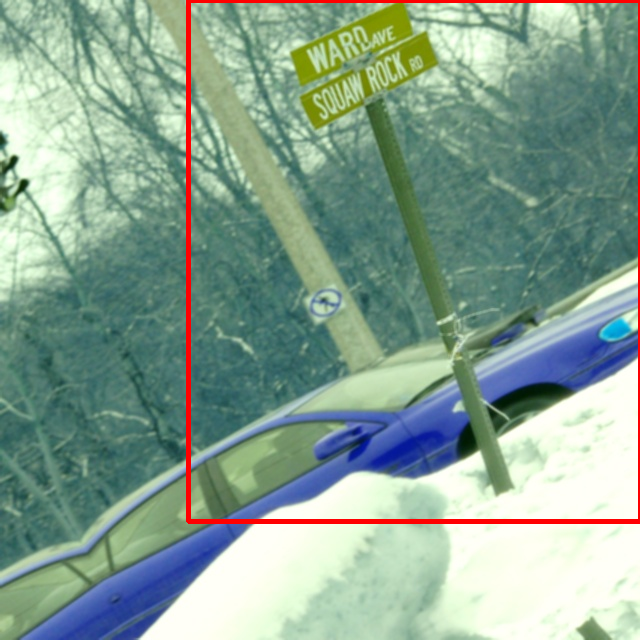

<Figure size 288x216 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [ ]:
## ploting image that have more than one bounding box
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
  

# Python program to explain cv2.rectangle() method 
image_pth = "/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/Augmanted_images"
image_name = augmanted_data.iloc[1, 4]
bounding_box = augmanted_data.iloc[1, 0:4]
# importing cv2 
import cv2 
plt.figure(figsize=(4, 3))
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 5
   
# Reading an image in default mode
src = cv2.imread(f"{image_pth}/{image_name}")
img_cordicate_val = bounding_box
img_cordicate_shap = np.array(img_cordicate_val).reshape(4,)
x_min = int(img_cordicate_shap[0])
x_max = int(img_cordicate_shap[2])
y_min = int(img_cordicate_shap[1])
y_max = int(img_cordicate_shap[3])
cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
cv2_imshow(src)

<Figure size 288x216 with 0 Axes>

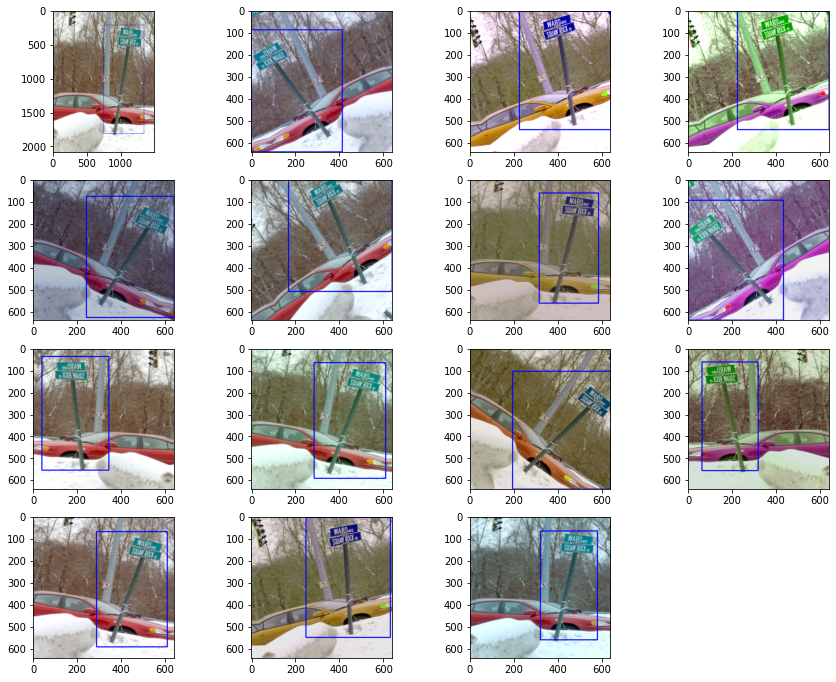

In [ ]:
## ploting image that have only one bounding box
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
  

# Python program to explain cv2.rectangle() method 
   
# importing cv2 
import cv2 
plt.figure(figsize=(4, 3))
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 5
   
# Reading an image in default mode
for i in range(1, len(images_list)):
  src = images_list[i-1]
  img_cordicate_val = saved_bboxes[i-1]
  img_cordicate_shap = np.array(img_cordicate_val).reshape(4,)
  x_min = int(img_cordicate_shap[0])
  x_max = int(img_cordicate_shap[2])
  y_min = int(img_cordicate_shap[1])
  y_max = int(img_cordicate_shap[3])
  cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
  fig.add_subplot(rows, columns, i)
  plt.imshow(src)

In [ ]:
## transformation for image with more than one bounding box
def mone_bounding_image_augmantation(df, imgpath, index_img, nu_aug):
  augmanted_data = pd.DataFrame(columns = df_voc.columns)
  indexs = df[df["image_path"] == imgpath].index
  image = df.iloc[indexs[0],4]
  bboxes = df.iloc[indexs,0:4].values
  image = cv2.imread(f"{scr_calss}/{image}")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Pascal_voc (x_min, y_min, x_max, y_max), YOLO, COCO

  transform = A.Compose(
      [
          A.Resize(width=640, height=640),
          A.Rotate(limit=40, p=0.9),
          A.HorizontalFlip(p=0.5),
          A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
          A.OneOf([
              A.Blur(blur_limit=3, p=0.5),
              A.ColorJitter(p=0.5),
          ], p=1.0),
      ], bbox_params=A.BboxParams(format="pascal_voc", min_area=2048,
                                  min_visibility=0.3, label_fields=[])
  )

  images_list = [image]
  saved_bboxes = [bboxes]
  img_name = imgpath.split(".")[0]
  for i in range(nu_aug):
      augmentations = transform(image=image, bboxes=bboxes)
      augmented_img = augmentations["image"]

      if len(augmentations["bboxes"]) == 0:
          continue
      images_list.append(augmented_img)
      saved_bboxes.append(augmentations["bboxes"])
      for bbox in augmentations["bboxes"]:
        data = [bbox[0], bbox[1], bbox[2], bbox[3], f"{img_name}{i}.jpeg", df_voc["class"][0], df_voc["name"][0]]
        temp_df = pd.DataFrame([data], columns=["xmin", "ymin", "xmax", "ymax", "image_path", "class", "name"], index=[i+1+(index_img*16)])
        augmanted_data = pd.concat([augmanted_data, temp_df])
      cv2.imwrite(os.path.join(target_class , f"{img_name}{i}.jpeg"), augmented_img)
  cv2.imwrite(os.path.join(target_class , f"{img_name}.jpeg"), image)
  orgin_img = df_voc[df_voc["image_path"] == imgpath]   
  augmanted_data = pd.concat([orgin_img, augmanted_data])


  return images_list, saved_bboxes, augmanted_data

In [ ]:
## Run the function over the images
img_count = {}
for img in df_voc["image_path"]:
  if img in img_count.keys():
    img_count[img] += 1
  else:
    img_count[img] = 1

In [ ]:
# Writting csv file which contain bounding box
augmanted_data = pd.DataFrame(columns = df_voc.columns)
index_img = 0
for img_path, bounding in img_count.items():
  if bounding == 1:
    try:
      images_list, saved_bboxes, augmanted_data_img = one_bounding_image_augmantation(df_voc, img_path, index_img)
      index_img += 1
      augmanted_data = pd.concat([augmanted_data, augmanted_data_img]) 
    except Exception as e:
      continue
  else:
    try:
      images_list, saved_bboxes, augmanted_data_img = mone_bounding_image_augmantation(df_voc, img_path, index_img)
      index_img += 1
      augmanted_data = pd.concat([augmanted_data, augmanted_data_img]) 
    except Exception as e:
      continue

In [ ]:
augmanted_data.reset_index()
augmanted_data.to_csv(f"{labels_class}/BROKEN_SIGNAGE.csv")

In [ ]:
augmanted_data.head()

xmin       ymin        xmax        ymax                   image_path  \
0       748.0      206.0      1342.0      1806.0   brokenstreetsignage78.jpeg   
1  253.504785  74.586225  639.221441  619.831431  brokenstreetsignage780.jpeg   
2  216.201326        0.0       640.0  535.020089  brokenstreetsignage781.jpeg   
3         0.0  84.768418  412.022073  638.239134  brokenstreetsignage782.jpeg   
4         0.0        0.0  410.138137   540.28903  brokenstreetsignage783.jpeg   

   class            name  
0    5.0  BROKEN_SIGNAGE  
1    5.0  BROKEN_SIGNAGE  
2    5.0  BROKEN_SIGNAGE  
3    5.0  BROKEN_SIGNAGE  
4    5.0  BROKEN_SIGNAGE

In [ ]:
print(len(augmanted_data["image_path"]))
print(len(os.listdir("/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/Augmanted_images")))
print(len(os.listdir("/content/gdrive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE")))

1891
1627
110


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/Augmanted_images/date_scv/BROKEN_SIGNAGE.csv")
indexes = df[df["image_path"] == "brokenstreetsignage626.jpeg"].index
print(indexes)
df.drop(["Unnamed: 0"],axis=1, inplace=True)

Int64Index([46, 47], dtype='int64')


In [ ]:
df.head()

xmin        ymin         xmax         ymax  \
0  748.000000  206.000000  1342.000000  1806.000000   
1  253.504785   74.586225   639.221441   619.831431   
2  216.201326    0.000000   640.000000   535.020089   
3    0.000000   84.768418   412.022073   638.239134   
4    0.000000    0.000000   410.138137   540.289030   

                    image_path  class            name  
0   brokenstreetsignage78.jpeg    5.0  BROKEN_SIGNAGE  
1  brokenstreetsignage780.jpeg    5.0  BROKEN_SIGNAGE  
2  brokenstreetsignage781.jpeg    5.0  BROKEN_SIGNAGE  
3  brokenstreetsignage782.jpeg    5.0  BROKEN_SIGNAGE  
4  brokenstreetsignage783.jpeg    5.0  BROKEN_SIGNAGE

<Figure size 288x216 with 0 Axes>

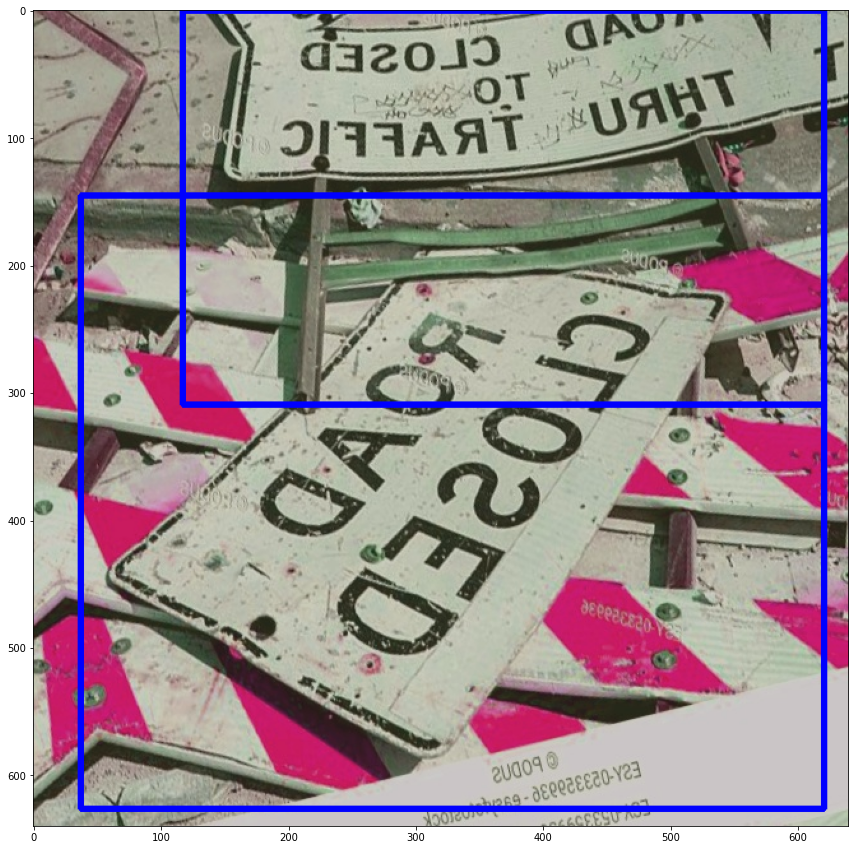

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
fig = plt.figure(figsize=(15, 15))
image_pth = "/content/drive/MyDrive/Smarthachthon/classes/BROKEN_SIGNAGE/Augmanted_images/"  
image_name = "brokenstreetsignage626.jpeg"
bounding_box = df.iloc[[46, 47], 0:4].values
   
# Reading an image in default mode
src = cv2.imread(f"{image_pth}/{image_name}")

img_cordicate_val = bounding_box
for box in img_cordicate_val:
  img_cordicate_shap = box.reshape(4,)
  x_min = int(img_cordicate_shap[0])
  x_max = int(img_cordicate_shap[2])
  y_min = int(img_cordicate_shap[1])
  y_max = int(img_cordicate_shap[3])
  cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
plt.imshow(src)
# display that image
plt.show()

<ipython-input-245-45cf3945fd97>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(rows, columns, i)


<Figure size 288x216 with 0 Axes>

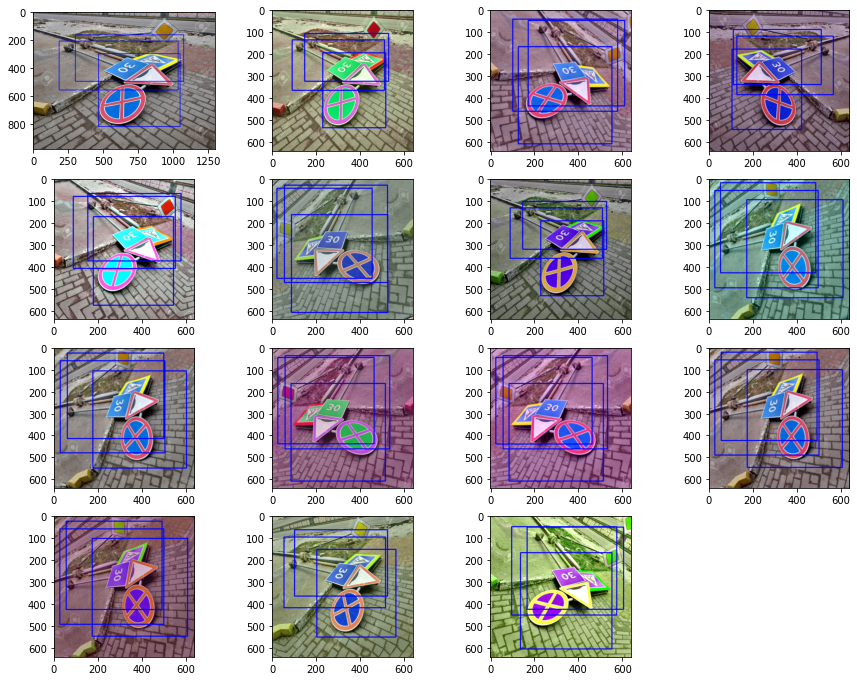

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
  

# Python program to explain cv2.rectangle() method 
   
# importing cv2 
import cv2 
plt.figure(figsize=(4, 3))
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 5
   
# Reading an image in default mode
for i in range(1, len(images_list)):
  src = images_list[i-1]
  for box in saved_bboxes[i-1]:
    img_cordicate_val = box
    img_cordicate_shap = np.array(img_cordicate_val).reshape(4,)
    x_min = int(img_cordicate_shap[0])
    x_max = int(img_cordicate_shap[2])
    y_min = int(img_cordicate_shap[1])
    y_max = int(img_cordicate_shap[3])
    cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(src)

## Running the albumnetation for the four classes GRAFFITI, POTHOLES CONSTRION_ROUD, CLUTTER_SIDEWALK

In [ ]:
categeries = ["GRAFFITI", "POTHOLES", "CONSTRUCTION_ROAD", "CLUTTER_SIDEWALK"]
## working on the first class to albumentations
import os
scr_calss = f"/content/drive/MyDrive/Smarthachthon/classes/{categeries[3]}"
target_class = f"/content/drive/MyDrive/Smarthachthon/classes/{categeries[3]}/Augmanted_images"
if os.path.exists(target_class):
  pass
else:
  os.mkdir(target_class)
labels_class = f"/content/drive/MyDrive/Smarthachthon/classes/{categeries[3]}/Augmanted_images/date_scv"
if os.path.exists(labels_class):
  pass
else:
  os.mkdir(labels_class)

In [ ]:
## read_csv of the BROKEN_SIGNAGE class to extract data of bounding box
CLUTTER_SIDEWALK = pd.read_csv(f"{scr_calss}/data_csv/{categeries[3]}.csv")
CLUTTER_SIDEWALK.head()

Unnamed: 0  class                            image_path              name  \
0          21    9.0  467758955ec29fa2475ef6887c29b751.jpg  CLUTTER_SIDEWALK   
1          22    9.0  467758955ec29fa2475ef6887c29b751.jpg  CLUTTER_SIDEWALK   
2          58    9.0  782429d6375c7e7b9a6875d6c1528c1a.jpg  CLUTTER_SIDEWALK   
3          59    9.0  782429d6375c7e7b9a6875d6c1528c1a.jpg  CLUTTER_SIDEWALK   
4          70    9.0  b3cc08ddf4d48858afba0750bc68d33e.jpg  CLUTTER_SIDEWALK   

    xmax   xmin   ymax   ymin  
0  495.0  111.0  312.0  202.0  
1  943.0  386.0  335.0  199.0  
2  333.0  115.0  239.0  156.0  
3  755.0  523.0  260.0  168.0  
4  461.0  257.0  269.0  194.0

In [ ]:
# adjust the bonding box to feed for transformar
# adjust pascal_voc format xmin, ymin, xmax, ymax
def adjust_pascal_voc(df):
  df_voc = (df[["xmin", "ymin", "xmax", "ymax"]]*2).astype(np.int64)
  df_voc[["image_path", "class", "name"]] = df[["image_path", "class", "name"]]
  return df_voc
df_voc = adjust_pascal_voc(CLUTTER_SIDEWALK)
df_voc.head()

xmin  ymin  xmax  ymax                            image_path  class  \
0   222   404   990   624  467758955ec29fa2475ef6887c29b751.jpg    9.0   
1   772   398  1886   670  467758955ec29fa2475ef6887c29b751.jpg    9.0   
2   230   312   666   478  782429d6375c7e7b9a6875d6c1528c1a.jpg    9.0   
3  1046   336  1510   520  782429d6375c7e7b9a6875d6c1528c1a.jpg    9.0   
4   514   388   922   538  b3cc08ddf4d48858afba0750bc68d33e.jpg    9.0   

               name  
0  CLUTTER_SIDEWALK  
1  CLUTTER_SIDEWALK  
2  CLUTTER_SIDEWALK  
3  CLUTTER_SIDEWALK  
4  CLUTTER_SIDEWALK

In [ ]:
## Run the function over the images
img_count = {}
for img in df_voc["image_path"]:
  if img in img_count.keys():
    img_count[img] += 1
  else:
    img_count[img] = 1

In [ ]:
# Writting csv file which contain bounding box
augmanted_data = pd.DataFrame(columns = df_voc.columns)
index_img = 0
nu_aug = 3
for img_path, bounding in img_count.items():
  if bounding == 1:
    try:
      images_list, saved_bboxes, augmanted_data_img = one_bounding_image_augmantation(df_voc, img_path, index_img, nu_aug)
      index_img += 1
      augmanted_data = pd.concat([augmanted_data, augmanted_data_img]) 
    except Exception as e:
      continue
  else:
    try:
      images_list, saved_bboxes, augmanted_data_img = mone_bounding_image_augmantation(df_voc, img_path, index_img, nu_aug)
      index_img += 1
      augmanted_data = pd.concat([augmanted_data, augmanted_data_img]) 
    except Exception as e:
      continue

In [ ]:
augmanted_data.reset_index()
augmanted_data.head()
print(augmanted_data.shape)

(1640, 7)


In [ ]:
augmanted_data.head()

xmin        ymin         xmax        ymax  \
0  222.000000  404.000000   990.000000  624.000000   
1  772.000000  398.000000  1886.000000  670.000000   
1   71.556020  225.471833   334.592306  370.268170   
1  253.030534  232.405971   632.973561  414.562010   
2   69.414528  238.937743   333.113727  385.164993   

                               image_path  class              name  
0    467758955ec29fa2475ef6887c29b751.jpg    9.0  CLUTTER_SIDEWALK  
1    467758955ec29fa2475ef6887c29b751.jpg    9.0  CLUTTER_SIDEWALK  
1  467758955ec29fa2475ef6887c29b7510.jpeg    9.0  CLUTTER_SIDEWALK  
1  467758955ec29fa2475ef6887c29b7510.jpeg    9.0  CLUTTER_SIDEWALK  
2  467758955ec29fa2475ef6887c29b7511.jpeg    9.0  CLUTTER_SIDEWALK

In [ ]:
## concat the two df
augmanted_data.to_csv(f"{labels_class}/{categeries[3]}.csv")
augmanted_data = pd.read_csv(f"{labels_class}/{categeries[3]}.csv")
augmanted_data = pd.concat([augmanted_data,df_voc])
augmanted_data.drop_duplicates(inplace=True)
augmanted_data.to_csv(f"{labels_class}/{categeries[3]}.csv")
augmanted_data.head()

Unnamed: 0        xmin        ymin         xmax        ymax  \
0         0.0  222.000000  404.000000   990.000000  624.000000   
1         1.0  772.000000  398.000000  1886.000000  670.000000   
2         1.0   71.556020  225.471833   334.592306  370.268170   
3         1.0  253.030534  232.405971   632.973561  414.562010   
4         2.0   69.414528  238.937743   333.113727  385.164993   

                               image_path  class              name  
0    467758955ec29fa2475ef6887c29b751.jpg    9.0  CLUTTER_SIDEWALK  
1    467758955ec29fa2475ef6887c29b751.jpg    9.0  CLUTTER_SIDEWALK  
2  467758955ec29fa2475ef6887c29b7510.jpeg    9.0  CLUTTER_SIDEWALK  
3  467758955ec29fa2475ef6887c29b7510.jpeg    9.0  CLUTTER_SIDEWALK  
4  467758955ec29fa2475ef6887c29b7511.jpeg    9.0  CLUTTER_SIDEWALK

In [ ]:
##copying the source image to augmanted img
!rsync -a "/content/drive/MyDrive/Smarthachthon/classes/CLUTTER_SIDEWALK/" "$target_class"

In [ ]:
print(len(augmanted_data["image_path"]))
print(len(os.listdir(target_class)))
print(len(os.listdir(scr_calss)))

3432
1797
904


In [ ]:
## adjust garbage VOC bounding
# adjust pascal_voc format xmin, ymin, xmax, ymax
def adjust_pascal_voc(df):
  df_voc = (df[["xmin", "ymin", "xmax", "ymax"]]*2).astype(np.int64)
  df_voc[["image_path", "class", "name"]] = df[["image_path", "class", "name"]]
  return df_voc
GARBAGE = pd.read_csv("/content/drive/MyDrive/Smarthachthon/classes/GARBAGE/data_csv/GARBAGE.csv")
df_voc = adjust_pascal_voc(GARBAGE)
df_voc.head()
df_voc.to_csv("/content/drive/MyDrive/Smarthachthon/classes/GARBAGE/data_csv/GARBAGE.csv")

In [ ]:
import pandas as pd
img_path = "b079df7a0c498c361028fc7e97e310340.jpeg"
scr_img = "/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI/GRAFFITI"
scr_df ="/content/gdrive/MyDrive/Smarthachthon/classes/GRAFFITI/GRAFFITI/date_scv"
df = pd.read_csv(f"{scr_df}/GRAFFITI.csv")
df.head()

Unnamed: 0  Unnamed: 0.1         xmin        ymin         xmax        ymax  \
0           0           0.0  1040.000000  288.000000  1460.000000  468.000000   
1           1           1.0   153.333333  170.666667   293.333333  277.333333   
2           2           2.0   104.161979  198.331706   277.075081  356.324761   
3           3          16.0  1252.000000  306.000000  1428.000000  480.000000   
4           4          17.0   206.391381  119.817476   310.706680  238.355850   

                               image_path  class      name  
0    4218ea76033c0d0612ba5d68bdcacaa7.jpg    0.0  GRAFFITI  
1  4218ea76033c0d0612ba5d68bdcacaa70.jpeg    0.0  GRAFFITI  
2  4218ea76033c0d0612ba5d68bdcacaa71.jpeg    0.0  GRAFFITI  
3    b079df7a0c498c361028fc7e97e31034.jpg    0.0  GRAFFITI  
4  b079df7a0c498c361028fc7e97e310340.jpeg    0.0  GRAFFITI

In [ ]:
df[df["image_path"] == img_path].index

Int64Index([4], dtype='int64')

<Figure size 288x216 with 0 Axes>

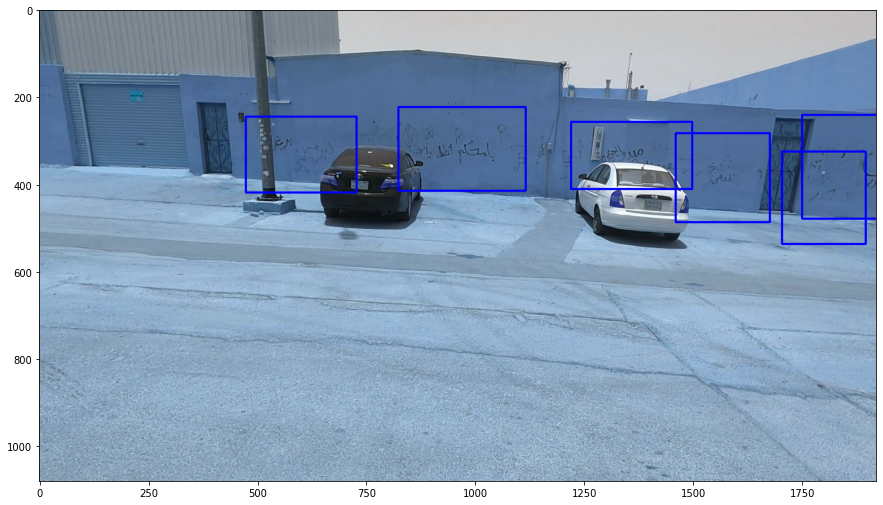

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
fig = plt.figure(figsize=(15, 15))
image_pth = scr_img 
image_name = "51efc2c5e9e17e12d3986845636a7fc7.jpg"
bounding_box = df.iloc[[1767, 1768, 1769, 1770, 1771, 1772], 2:6].values
   
# Reading an image in default mode
src = cv2.imread(f"{image_pth}/{image_name}")
img_cordicate_val = bounding_box
for box in img_cordicate_val:
  img_cordicate_shap = box.reshape(4,)
  x_min = int(img_cordicate_shap[0])
  x_max = int(img_cordicate_shap[2])
  y_min = int(img_cordicate_shap[1])
  y_max = int(img_cordicate_shap[3])
  cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
plt.imshow(src)
# display that image
plt.show()

In [ ]:
import os
print(len(os.listdir("/content/gdrive/MyDrive/Smarthachthon/classes/CONSTRUCTION_ROAD/Augmanted_images")))
print(len(os.listdir("/content/gdrive/MyDrive/Smarthachthon/classes/CONSTRUCTION_ROAD/Augmanted_images/Augmanted_images")))

1695
865


## Collecting validation_data

In [ ]:
validation_df = pd.read_csv("/content/gdrive/MyDrive/Smarthachthon/classes/valid_data.csv")
validation_df.head()

Unnamed: 0  Unnamed: 0.1  class                            image_path  \
0           0          8709    3.0  f583ecc4d04bdaa9a971febbb202f186.jpg   
1           1          9006    3.0  b1330c60d199e75e115c4a4524c8b6fe.jpg   
2           2          4550    3.0  3e8e0dbcb62d7d0f120e8dde41e7941e.jpg   
3           3          5057    8.0  101d304bf1fec95d8bfe1751e27df0c4.jpg   
4           4          2501    3.0  dc20585c094cb9fb31a761fb84b050f6.jpg   

           name    xmax    xmin   ymax   ymin  
0       GARBAGE  1730.0  1336.0  654.0  450.0  
1       GARBAGE   404.0   280.0  620.0  520.0  
2       GARBAGE   166.0    -4.0  680.0  576.0  
3  SAND_ON_ROAD  1508.0  1382.0  448.0  392.0  
4       GARBAGE  1756.0  1558.0  478.0  356.0

In [ ]:
validation_df.to_csv("/content/gdrive/MyDrive/Smarthachthon/classes/valid_data.csv")

In [ ]:
validation_df.head()

Unnamed: 0  Unnamed: 0.1  class                            image_path  \
0           0          8709    3.0  f583ecc4d04bdaa9a971febbb202f186.jpg   
1           1          9006    3.0  b1330c60d199e75e115c4a4524c8b6fe.jpg   
2           2          4550    3.0  3e8e0dbcb62d7d0f120e8dde41e7941e.jpg   
3           3          5057    8.0  101d304bf1fec95d8bfe1751e27df0c4.jpg   
4           4          2501    3.0  dc20585c094cb9fb31a761fb84b050f6.jpg   

           name    xmax    xmin   ymax   ymin  
0       GARBAGE  1730.0  1336.0  654.0  450.0  
1       GARBAGE   404.0   280.0  620.0  520.0  
2       GARBAGE   166.0    -4.0  680.0  576.0  
3  SAND_ON_ROAD  1508.0  1382.0  448.0  392.0  
4       GARBAGE  1756.0  1558.0  478.0  356.0

In [ ]:
image_path = validation_df["image_path"]

In [ ]:
import shutil
if os.path.exists("/content/gdrive/MyDrive/Smarthachthon/classes/validation"):
  pass
else:
  os.mkdir("/content/gdrive/MyDrive/Smarthachthon/classes/validation")


scr_dir = "/content/dataset/images"
dsc_dir = "/content/gdrive/MyDrive/Smarthachthon/classes/validation/images" 
for i, img_name in image_path.iteritems():
  shutil.copy(f"{scr_dir}/{img_name}", dsc_dir)

In [ ]:
image_path = Aannotaion_mosa["image_path"]
for i, img_name in image_path.iteritems():
  if img_name in os.listdir("/content/dataset/valid/images"):
    print(img_name)

In [ ]:
img_path = "dc20585c094cb9fb31a761fb84b050f6.jpg"
validation_df[validation_df["image_path"] == img_path].index

Int64Index([4], dtype='int64')

<Figure size 288x216 with 0 Axes>

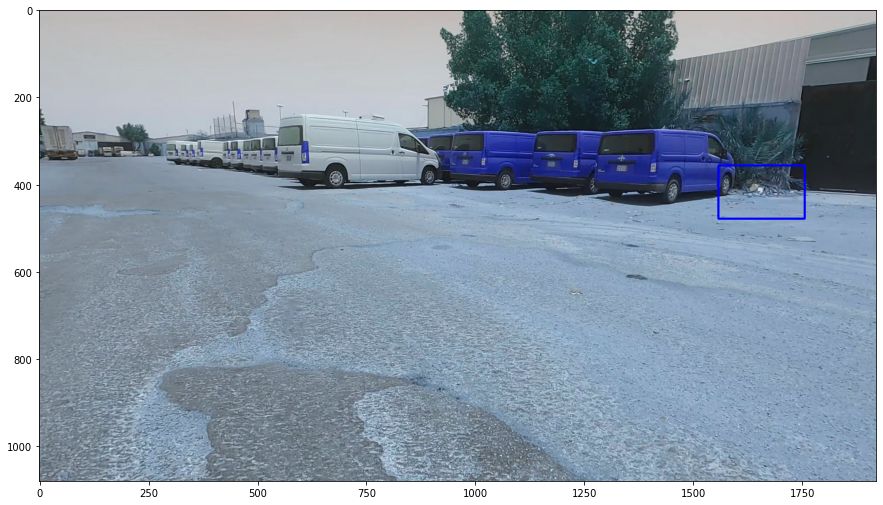

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
fig = plt.figure(figsize=(15, 15))
image_pth = dsc_dir
img_path = "dc20585c094cb9fb31a761fb84b050f6.jpg"
# Reading an image in default mode
src = cv2.imread(f"{dsc_dir}/{img_path}")
img_cordicate_val = validation_df.iloc[4, 5:]
#img_cordicate_shap = box.reshape(4,)
x_min = int(img_cordicate_val[1])
x_max = int(img_cordicate_val[0])
y_min = int(img_cordicate_val[3])
y_max = int(img_cordicate_val[2])
cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
plt.imshow(src)
# display that image
plt.show()

In [ ]:
!mv "/content/dataset/valid" "/content/gdrive/MyDrive/Smarthachthon/classes/validation"

In [ ]:
len(os.listdir(f"{dsc_dir}"))

1833

## Fixing missup

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
train = pd.read_csv("/content/gdrive/MyDrive/Theme#1_final/Train/train.csv")
valid =  pd.read_csv("/content/gdrive/MyDrive/Theme#1_final/validation/label/valid_data.csv")

In [ ]:
valid.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  class  \
0           0             0            8709    3.0   
1           1             1            9006    3.0   
2           2             2            4550    3.0   
3           3             3            5057    8.0   
4           4             4            2501    3.0   

                             image_path          name    xmax    xmin   ymax  \
0  f583ecc4d04bdaa9a971febbb202f186.jpg       GARBAGE  1730.0  1336.0  654.0   
1  b1330c60d199e75e115c4a4524c8b6fe.jpg       GARBAGE   404.0   280.0  620.0   
2  3e8e0dbcb62d7d0f120e8dde41e7941e.jpg       GARBAGE   166.0    -4.0  680.0   
3  101d304bf1fec95d8bfe1751e27df0c4.jpg  SAND_ON_ROAD  1508.0  1382.0  448.0   
4  dc20585c094cb9fb31a761fb84b050f6.jpg       GARBAGE  1756.0  1558.0  478.0   

    ymin  
0  450.0  
1  520.0  
2  576.0  
3  392.0  
4  356.0

In [ ]:
worng_ls = pd.read_csv("/content/re_img_list_path.csv")
worng_ls.head()

Unnamed: 0                              img_path
0           0  4bbf0419c85e35202dfe5f2da5a92369.jpg
1           1  7acfa7328cec4c015ad9ec1498eadfb9.jpg
2           2  57340fe68a702c327926daad74d22328.jpg
3           3  f05317a462347e9b1fd574a6e3cb7756.jpg
4           4  10815c9cdd54c437e7114ef84b09d0f1.jpg

In [ ]:
trnsfer_ls = worng_ls["img_path"]
transfer_df = valid[valid['image_path'].isin(trnsfer_ls)]
transfer_df.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  class  \
9            9             9            5899    9.0   
20          20            20            1700    0.0   
21          21            21            5075    3.0   
24          24            24             703    9.0   
28          28            28            1655    3.0   

                              image_path              name    xmax   xmin  \
9   e03c35eb9a0ee030a4e6e74f16dc7b29.jpg  CLUTTER_SIDEWALK  1666.0  818.0   
20  944c2aecb39e3e017bb0567d6557f408.jpg          GRAFFITI   240.0  -66.0   
21  16a1ce6220e7b7c75618a9def75dcee4.jpg           GARBAGE   790.0  594.0   
24  f86c350e2f075cf4b9d90a6292aa3b83.jpg  CLUTTER_SIDEWALK  1956.0  954.0   
28  c9ec3d0e81294a9a4af49beac042d18e.jpg           GARBAGE   618.0  552.0   

     ymax   ymin  
9   692.0  534.0  
20  336.0  128.0  
21  960.0  790.0  
24  840.0  396.0  
28  500.0  434.0

In [ ]:
train.shape

(36974, 10)

In [ ]:
train = pd.concat([train,transfer_df])
train.shape

(37171, 10)

In [ ]:
train.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1           name  \
0           0             0             0.0  BAD_BILLBOARD   
1           1             1             1.0  BAD_BILLBOARD   
2           2             2             2.0  BAD_BILLBOARD   
3           3             3             3.0  BAD_BILLBOARD   
4           4             4             4.0  BAD_BILLBOARD   

                             image_path    xmin   ymin    xmax   ymax  class  
0  ea906a663da6321bcef78be4b7d1afff.jpg  1572.0    0.0  1972.0  272.0    7.0  
1  9d100eb428edef6626df335ebf4a9def.jpg  1446.0   68.0  1876.0  336.0    7.0  
2  bc2e9e57a48ebccec901fb8a3822a1eb.jpg  1230.0  274.0  1444.0  362.0    7.0  
3  bc2e9e57a48ebccec901fb8a3822a1eb.jpg  1086.0  268.0  1344.0  376.0    7.0  
4  a33a221e5394da9294b9b3a6c815608b.jpg   272.0  302.0   680.0  512.0    7.0

In [ ]:
train.drop(["Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0"], axis=1, inplace=True)

In [ ]:
#train.reset_index(inplace=True)
train.drop(["index"], axis=1, inplace=True)
train.tail()

name                            image_path    xmin   ymin  \
37166            GARBAGE  f05317a462347e9b1fd574a6e3cb7756.jpg  1256.0  910.0   
37167      BAD_BILLBOARD  bcb423298740f1bbeb9d1a6f0fc88acb.jpg  1148.0  198.0   
37168   CLUTTER_SIDEWALK  b0806ce0e24a8fce5ca577c1fcd033f4.jpg   622.0  330.0   
37169       SAND_ON_ROAD  0727bfc0b63da0682930ac58a986aa72.jpg  1094.0  256.0   
37170  CONSTRUCTION_ROAD  9d062ea5f0948f541a32decbf419788f.jpg   106.0   38.0   

         xmax    ymax  class  
37166  1450.0  1070.0    3.0  
37167  1464.0   368.0    7.0  
37168  2196.0   834.0    9.0  
37169  1508.0   444.0    8.0  
37170   988.0   358.0    4.0

In [ ]:
train.shape

(37171, 8)

In [ ]:
train.to_csv("/content/gdrive/MyDrive/train.csv")

In [ ]:
transfer_index = valid[valid['image_path'].isin(trnsfer_ls)].index
len(transfer_index)

197

In [ ]:
print(valid.shape)
valid = valid.drop(transfer_index, axis=0)
print(valid.shape)

(1894, 10)
(1697, 10)


In [ ]:
valid.to_csv("/content/gdrive/MyDrive/valid.csv")

## Time to train model over sageMaker

## submision

In [ ]:
import pandas as pd
test = pd.read_csv("/content/dataset/test.csv")
test.shape

(2092, 1)

In [ ]:
test.head()

image_path
0  953ab1447c46ecfef67ab14629cd70c7.jpg
1  e4ddbaa7970fca225a51288ce5f7d3f9.jpg
2  5b8120d69607a077b7583334be3ba18b.jpg
3  138b1dc82005b4c33e4886260649d313.jpg
4  0f91ec1533b845b13089f8cf4e0a36f7.jpg

In [ ]:
submission = pd.read_csv("/content/first_submission.csv")
submission.shape

(1319, 8)

In [ ]:
data=test[test['image_path'].isin(submission["image_path"])]

In [ ]:
fault_sub = set(test['image_path']).difference(set(data['image_path']))

In [ ]:
fault_sub = test[~test["image_path"].isin(submission["image_path"])]

In [ ]:
submission = pd.concat([submission, fault_sub])

In [ ]:
submission.tail()

Unnamed: 0  class                            image_path  \
1314        1314      3  0d018b509a61b4c32ae9abe5b5bbe677.jpg   
1315        1315      9  18f3be9ba18e27eab083efdac0318a4f.jpg   
1316        1316      7  224a45bbf1d63b5ff5cc1a6f0a3301e5.jpg   
1317        1317      3  224a45bbf1d63b5ff5cc1a6f0a3301e5.jpg   
1318        1318      2  fe4aa65fe506e2f73e9fdd096166c5c7.jpg   

                  name        xmax         xmin       ymax        ymin  
1314           GARBAGE  1920.00100  1679.000600  690.99963  514.999600  
1315  CLUTTER_SIDEWALK   498.00095     0.000944  618.00030  363.000430  
1316     BAD_BILLBOARD   332.00024    -0.000372  279.00018   49.000137  
1317           GARBAGE   732.00070   580.000600  524.99990  393.000120  
1318          POTHOLES  1183.99960  1045.999800  544.00030  432.000000

In [ ]:
submission.drop(["Unnamed: 0"], axis=1)

class                            image_path              name  \
0         8  2158400c05b1a8801b35e9139309883a.jpg      SAND_ON_ROAD   
1         3  2158400c05b1a8801b35e9139309883a.jpg           GARBAGE   
2         3  2158400c05b1a8801b35e9139309883a.jpg           GARBAGE   
3         3  2158400c05b1a8801b35e9139309883a.jpg           GARBAGE   
4         3  2158400c05b1a8801b35e9139309883a.jpg           GARBAGE   
...     ...                                   ...               ...   
1314      3  0d018b509a61b4c32ae9abe5b5bbe677.jpg           GARBAGE   
1315      9  18f3be9ba18e27eab083efdac0318a4f.jpg  CLUTTER_SIDEWALK   
1316      7  224a45bbf1d63b5ff5cc1a6f0a3301e5.jpg     BAD_BILLBOARD   
1317      3  224a45bbf1d63b5ff5cc1a6f0a3301e5.jpg           GARBAGE   
1318      2  fe4aa65fe506e2f73e9fdd096166c5c7.jpg          POTHOLES   

            xmax         xmin        ymax        ymin  
0     1920.00000  1312.999600  1080.00000  401.999730  
1     1002.00000   675.999300   722.00000  437.999970  
2     1657.00040   800.000600  1056.00020  568.000060  
3     1919.99900  1548.999300  1040.99950  518.999940  
4     1559.00060  1301.000600   851.00000  639.000370  
...          ...          ...         ...         ...  
1314  1920.00100  1679.000600   690.99963  514.999600  
1315   498.00095     0.000944   618.00030  363.000430  
1316   332.00024    -0.000372   279.00018   49.000137  
1317   732.00070   580.000600   524.99990  393.000120  
1318  1183.99960  1045.999800   544.00030  432.000000  

[1319 rows x 7 columns]

In [ ]:
submission.fillna(method="ffill")

Unnamed: 0  class                            image_path          name  \
0            0.0    8.0  2158400c05b1a8801b35e9139309883a.jpg  SAND_ON_ROAD   
1            1.0    3.0  2158400c05b1a8801b35e9139309883a.jpg       GARBAGE   
2            2.0    3.0  2158400c05b1a8801b35e9139309883a.jpg       GARBAGE   
3            3.0    3.0  2158400c05b1a8801b35e9139309883a.jpg       GARBAGE   
4            4.0    3.0  2158400c05b1a8801b35e9139309883a.jpg       GARBAGE   
...          ...    ...                                   ...           ...   
2083      1318.0    2.0  a2f15c9214f5ada7889c481523b753e7.jpg      POTHOLES   
2084      1318.0    2.0  c3431e13ecc8208b1b318c19fb486212.jpg      POTHOLES   
2085      1318.0    2.0  f877caf864ff87b43c0f2307c4e2d741.jpg      POTHOLES   
2088      1318.0    2.0  a464d4600589ddf541bed59942c0228d.jpg      POTHOLES   
2091      1318.0    2.0  984841724143c66506986b3faa50e4b9.jpg      POTHOLES   

           xmax       xmin       ymax       ymin  
0     1920.0000  1312.9996  1080.0000  401.99973  
1     1002.0000   675.9993   722.0000  437.99997  
2     1657.0004   800.0006  1056.0002  568.00006  
3     1919.9990  1548.9993  1040.9995  518.99994  
4     1559.0006  1301.0006   851.0000  639.00037  
...         ...        ...        ...        ...  
2083  1183.9996  1045.9998   544.0003  432.00000  
2084  1183.9996  1045.9998   544.0003  432.00000  
2085  1183.9996  1045.9998   544.0003  432.00000  
2088  1183.9996  1045.9998   544.0003  432.00000  
2091  1183.9996  1045.9998   544.0003  432.00000  

[2910 rows x 8 columns]

In [ ]:
submission.to_csv("submitF.csv")